In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing important files....
import io
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from xgboost import XGBRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from statistics import mean, stdev
from sklearn import tree
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Parkinson disease.csv')


<ipython-input-18-11928c89b839>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


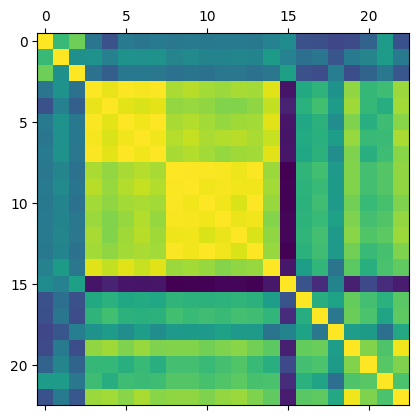

In [ ]:
plt.matshow(df.corr())
plt.show()

In [ ]:
feature_name=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']
_#Defining features(X) and labels(Y)....
X = df.drop(['status','name'],axis =1).values
y = df['status'].values



In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0)))

Before OverSampling, counts of label '1': 147
Before OverSampling, counts of label '0': 48 



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X_scaled, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (294, 22)
After OverSampling, the shape of train_y: (294,) 

After OverSampling, counts of label '1': 147
After OverSampling, counts of label '0': 147


In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_classif, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

Feature 0: 67.010733
Feature 1: 20.319968
Feature 2: 40.457820
Feature 3: 31.127549
Feature 4: 58.996673
Feature 5: 29.796920
Feature 6: 36.157184
Feature 7: 29.801028
Feature 8: 65.398399
Feature 9: 56.942315
Feature 10: 56.503707
Feature 11: 59.333974
Feature 12: 64.548857
Feature 13: 56.499408
Feature 14: 11.441381
Feature 15: 42.816283
Feature 16: 47.230268
Feature 17: 21.719721
Feature 18: 181.068048
Feature 19: 83.963560
Feature 20: 26.508436
Feature 21: 174.552378


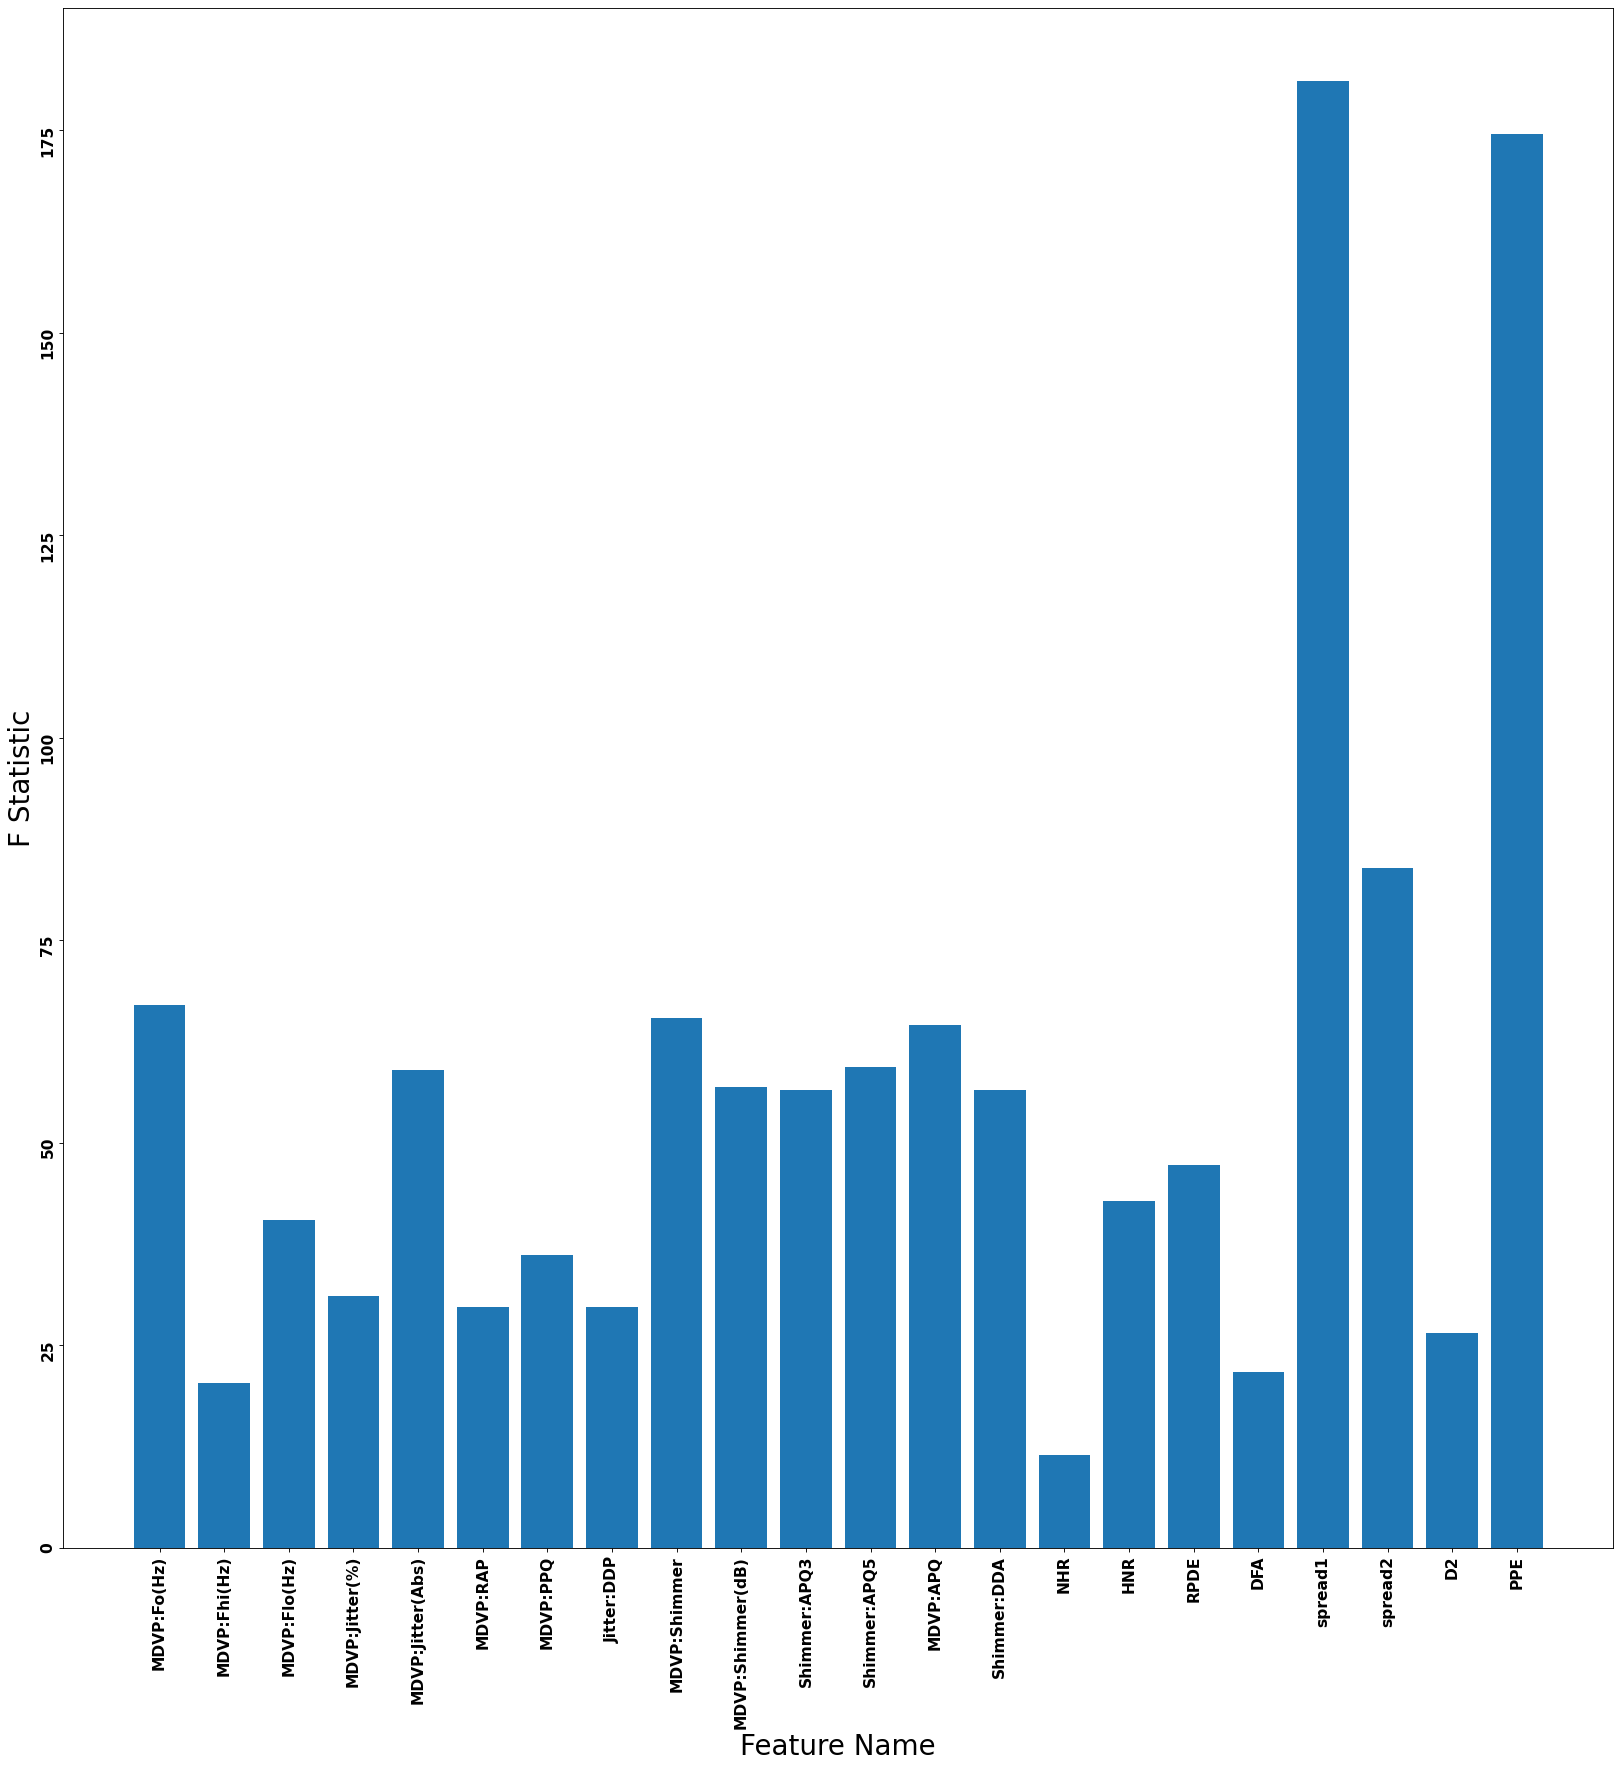

In [ ]:
f=[]
var=[]
var_f=[]
var_drop_f=[]
var_drop=[]
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,  test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
 f.append(fs.scores_[i])
 if(fs.scores_[i]>=14.320794330763384):
    var.append(feature_name[i])
    var_f.append(i)
 else:
     var_drop.append(feature_name[i])
     var_drop_f.append(i)
# plot the scores
from matplotlib.pyplot import figure


figure(figsize=(25, 25), dpi=80)
pyplot.bar(feature_name, fs.scores_)
plt.xticks(rotation='vertical',fontsize=14,fontweight='bold')
plt.yticks(rotation='vertical',fontsize=14,fontweight='bold')

font1 = {'color':'black','size':25}
font2 = {'color':'black','size':25}

plt.xlabel("Feature Name", fontdict = font2)
plt.ylabel("F Statistic", fontdict = font2)


plt.savefig("ANOVA"+'.png')


In [ ]:
var_drop_f

[14]

In [ ]:
var_drop

['NHR']

In [ ]:
var_f

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21]

In [ ]:
var

['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [ ]:
avg=sum(f)/22

In [ ]:
avg

57.37248218948026

In [ ]:
import statistics

sample = [1,2,3,4,5,5,5,5,10]
standard_deviation = statistics.stdev(f)
print(standard_deviation)

43.051687858716875


In [ ]:
print(avg-standard_deviation)

14.320794330763384
